In [14]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [2]:
#read the data from the file owl_smc_abc.pkl
with open('owl_smc_abc.pkl', 'rb') as f:
    data = pkl.load(f)

In [51]:
def _para_logit_transform(theta, bound):
    """Apply logit transform on the specified theta and bound range.

    Parameters
    ----------
    theta : np.array
        Array of parameter values
    bound: np.array
        Bounds for each parameter

    Returns
    -------
    theta_tilde : np.array
        The transformed parameter value array.

    """
    type_bnd = np.matmul(np.isinf(bound), [1, 2])
    type_str = type_bnd.astype(str)
    theta = theta.flatten()
    p = len(theta)
    theta_tilde = np.zeros(p)
    for i in range(p):
        a = bound[i, 0]
        b = bound[i, 1]
        x = theta[i]

        type_i = type_str[i]

        if type_i == '0':
            theta_tilde[i] = np.log((x - a)/(b - x))
        if type_i == '1':
            theta_tilde[i] = np.log(1/(b - x))
        if type_i == '2':
            theta_tilde[i] = np.log(x - a)
        if type_i == '3':
            theta_tilde[i] = x

    return theta_tilde


In [64]:
logit_transform_bound = np.array([
                                [0.1, 4],  # k
                                [0.01, 30],  # lmdr_r
                                [0.1, 5],  # rho
                                [0.1, 3.5]  # tau
                                ])

param_names = ['k', 'lmda_r', 'rho', 'tau']

# could do better
samples = np.empty((data.populations[-1].n_samples, len(param_names)))
count = 0
for k, v in data.populations[-1].outputs.items():
    print('k:', k)
    if k in param_names:
        samples[:, count] = np.array(v)
        count += 1

# samples_transformed = _para_logit_transform(samples[0, :], logit_transform_bound)
kwargs = {'bound': logit_transform_bound}
samples_transformed = np.apply_along_axis(func1d=_para_logit_transform,
                                          axis=1,
                                          arr=samples,
                                          **kwargs)
np.cov(samples_transformed.T)

k: d
k: k
k: lmda_r
k: rho
k: tau


array([[ 1.82484162,  0.04122204, -0.22807996, -0.05305404],
       [ 0.04122204,  3.41680703, -0.15229068,  0.17158555],
       [-0.22807996, -0.15229068,  2.46904036,  0.0493929 ],
       [-0.05305404,  0.17158555,  0.0493929 ,  2.54673614]])

In [48]:
samples

array([[ 3.28225472, 22.67558834,  2.69819   ,  3.36484054],
       [ 2.69852684, 18.82069316,  2.23487699,  2.52432777],
       [ 1.38544547, 21.40878269,  0.76100092,  1.58848121],
       [ 2.96320825, 17.98898751,  0.9663327 ,  0.23676371],
       [ 3.00472484, 22.24290321,  2.06123834,  1.48495824],
       [ 1.07712345, 13.84977362,  1.79292263,  1.04481671],
       [ 2.07327714, 16.44241918,  3.16505602,  3.03906976],
       [ 1.72283612, 15.99996741,  2.32970948,  0.7773426 ],
       [ 2.33719887, 12.05519834,  0.59007915,  1.4549799 ],
       [ 2.08644677,  0.7115629 ,  1.19964593,  1.36485797],
       [ 1.25439032, 18.26546083,  1.61823468,  0.47037606],
       [ 1.76698714, 20.28680976,  0.78050323,  1.7563124 ],
       [ 0.41586554,  8.61041489,  4.56398065,  2.79997988],
       [ 3.22996694,  9.61936075,  1.80968265,  2.42123806],
       [ 3.58446282, 26.04316488,  1.42079663,  1.12667753],
       [ 1.87930272, 13.43694472,  1.26797389,  1.82545967],
       [ 1.61160911, 14.

AttributeError: No attribute 'n_params' in this sample

5

dict_items([('d', array([ 220.97741622,  266.80062816,  275.18587023,  277.23853479,
        308.83132579,  312.44169586,  325.97093509,  349.45788434,
        362.39110753,  362.72889602,  394.91331363,  396.27384956,
        421.02472629,  449.83511441,  470.14422954,  490.8957903 ,
        499.93451327,  515.91777277,  524.22094308,  534.77670159,
        534.9464065 ,  544.191391  ,  555.96209279,  562.04385783,
        566.36191563,  570.68834612,  614.15340342,  618.82772418,
        622.55279967,  625.68079261,  627.06418882,  642.86774497,
        644.23635963,  651.50115723,  662.83753734,  674.44046501,
        677.11200225,  679.87803881,  680.49388417,  701.41836568,
        715.4914605 ,  720.36267711,  731.7017677 ,  750.93473609,
        760.17635455,  763.11736806,  775.36669788,  786.84021906,
        796.4446234 ,  822.91824445,  827.23593397,  841.99556973,
        857.06424972,  864.92478359,  894.81392523,  901.67457412,
        905.68419749,  905.78283453,  914.76

dict_keys(['d', 'k', 'lmda_r', 'rho', 'tau'])

In [22]:
data.populations[-1].outputs.values()

dict_values([array([ 220.97741622,  266.80062816,  275.18587023,  277.23853479,
        308.83132579,  312.44169586,  325.97093509,  349.45788434,
        362.39110753,  362.72889602,  394.91331363,  396.27384956,
        421.02472629,  449.83511441,  470.14422954,  490.8957903 ,
        499.93451327,  515.91777277,  524.22094308,  534.77670159,
        534.9464065 ,  544.191391  ,  555.96209279,  562.04385783,
        566.36191563,  570.68834612,  614.15340342,  618.82772418,
        622.55279967,  625.68079261,  627.06418882,  642.86774497,
        644.23635963,  651.50115723,  662.83753734,  674.44046501,
        677.11200225,  679.87803881,  680.49388417,  701.41836568,
        715.4914605 ,  720.36267711,  731.7017677 ,  750.93473609,
        760.17635455,  763.11736806,  775.36669788,  786.84021906,
        796.4446234 ,  822.91824445,  827.23593397,  841.99556973,
        857.06424972,  864.92478359,  894.81392523,  901.67457412,
        905.68419749,  905.78283453,  914.7609532

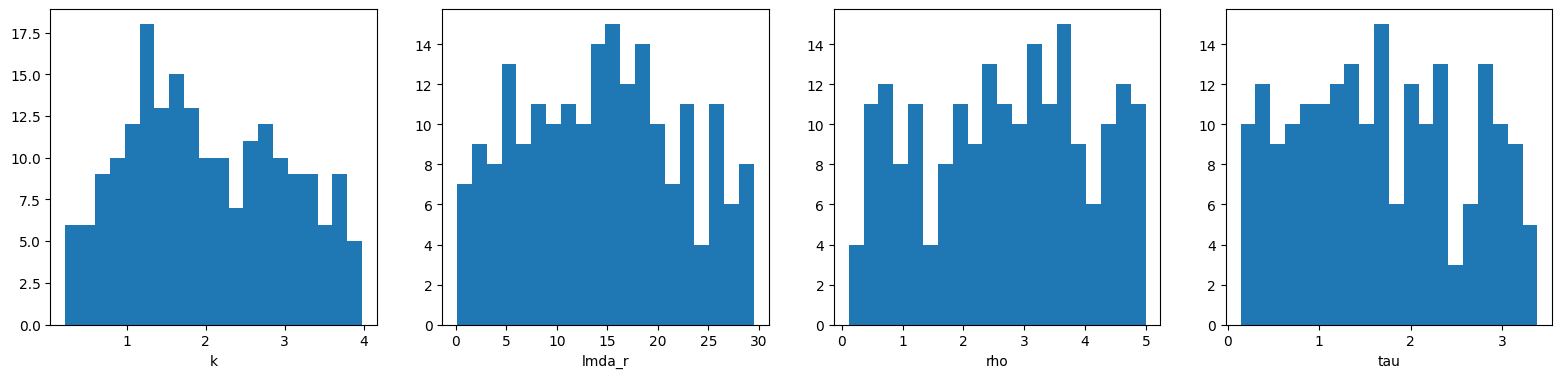

In [4]:
data.plot_marginals()

array([[<Axes: ylabel='k'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='lmda_r'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='rho'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='k', ylabel='tau'>, <Axes: xlabel='lmda_r'>,
        <Axes: xlabel='rho'>, <Axes: xlabel='tau'>]], dtype=object)

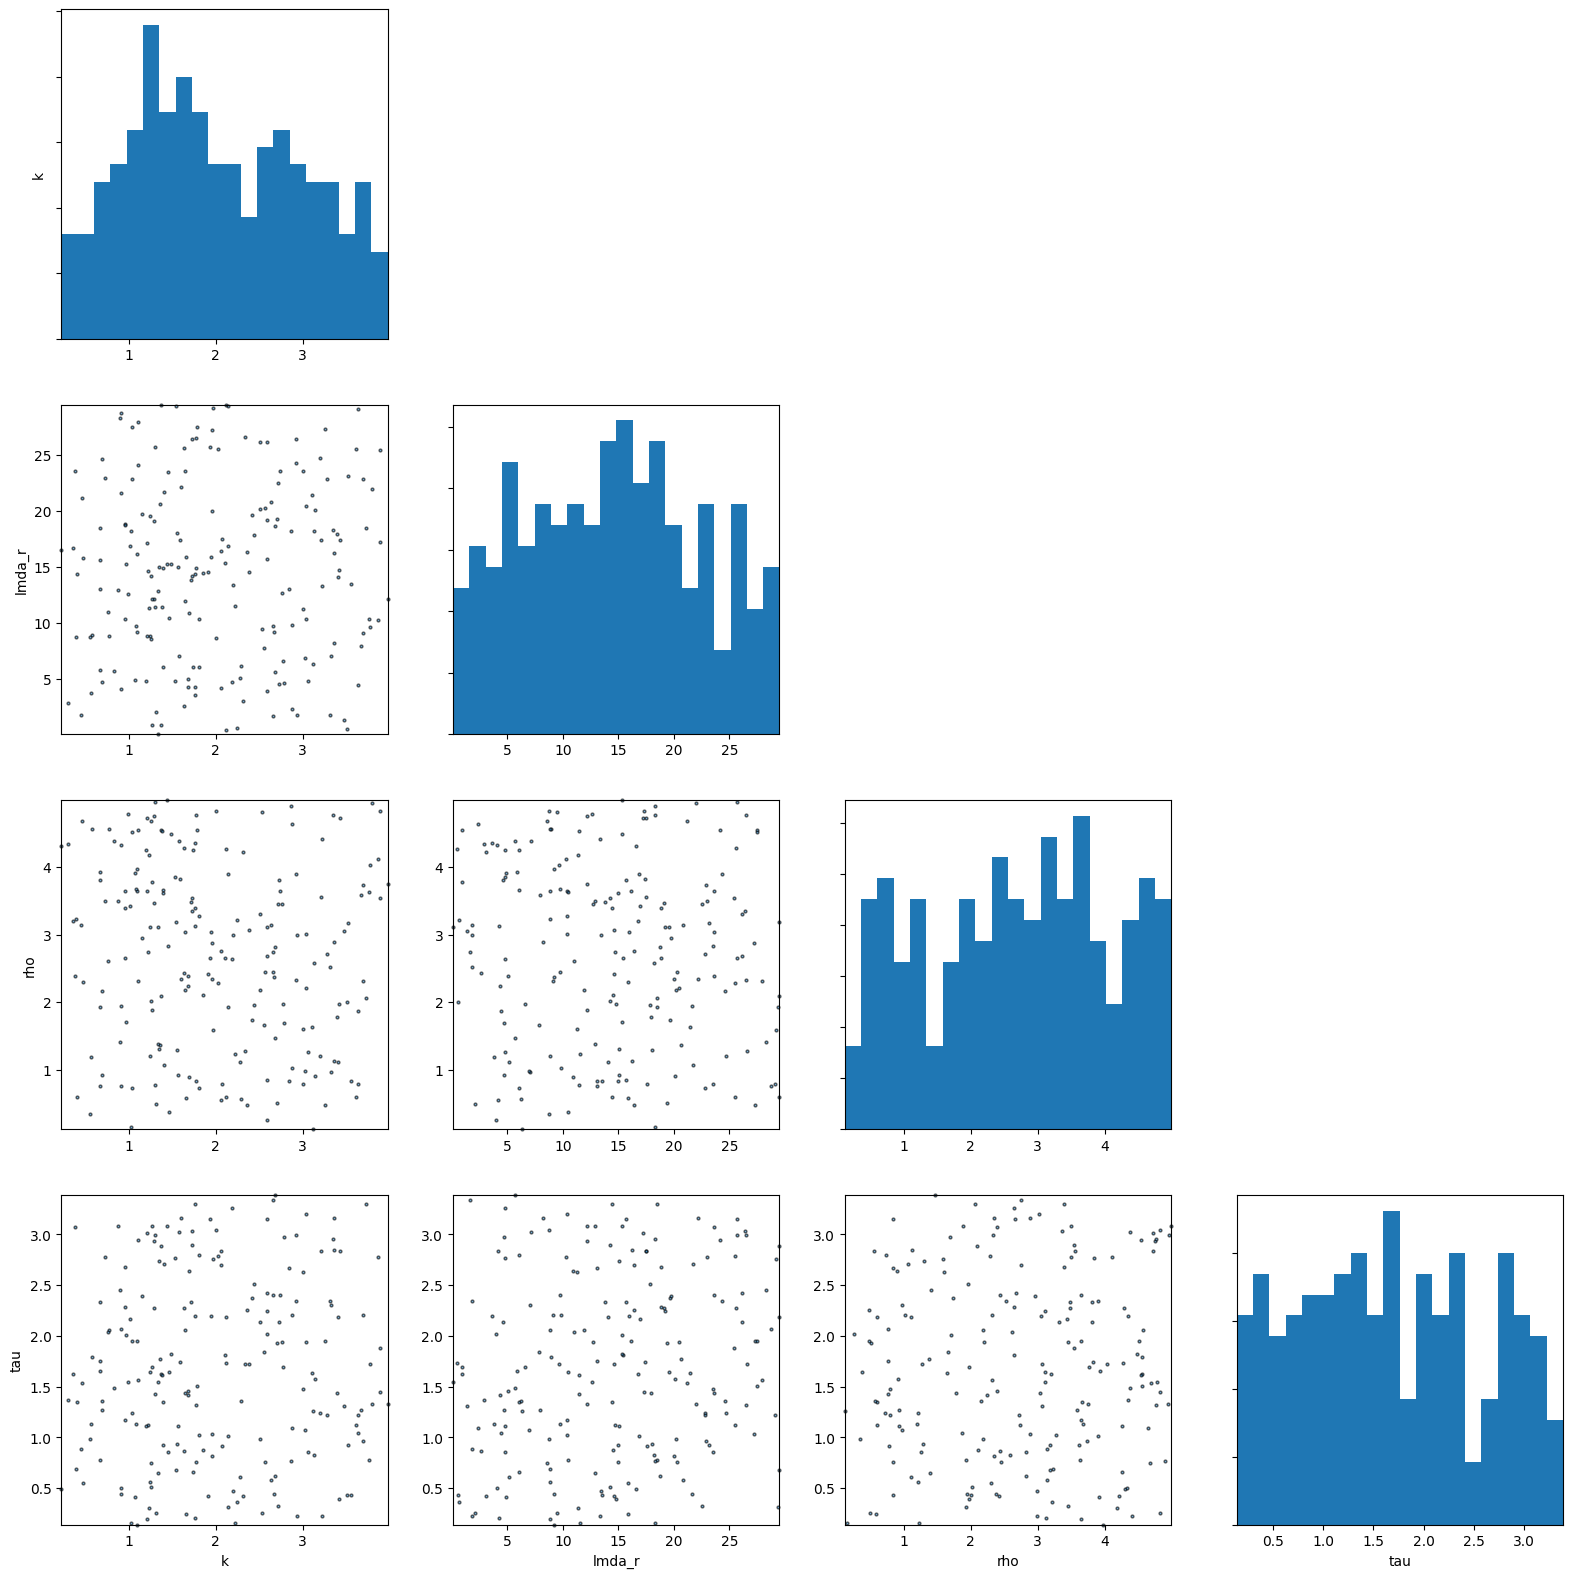

In [14]:
data.populations[1].plot_pairs()